# Exploration du dataset

In [1]:
# importer les bibliothèque nécessaires
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-11-30 19:22:34.060609: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 19:22:34.071865: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 19:22:34.100740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732990954.173632    8030 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732990954.200016    8030 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 19:22:34.303820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Charger les données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Classes CIFAR-10
cifar10_classes= ["Avion", "Automobile", "Oiseau", "Chat", "Cerf", "Chien", "Grenouille", "Cheval", "Bateau", "Camion"]

# Afficher la forme des ensembles d'entrainement et de test
print("Forme de l'ensemble d'entrainement (images):{}".format(x_train.shape))
print("Forme de l'ensemble de test (étiquettes):{}".format(y_train.shape))
print("Forme de l'ensemble de test (images):{}".format(x_test.shape))
print("Forme de l'ensemble de test (étiquettes):{}".format(y_test.shape))

Forme de l'ensemble d'entrainement (images):(50000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes):(50000, 1)
Forme de l'ensemble de test (images):(10000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes):(10000, 1)


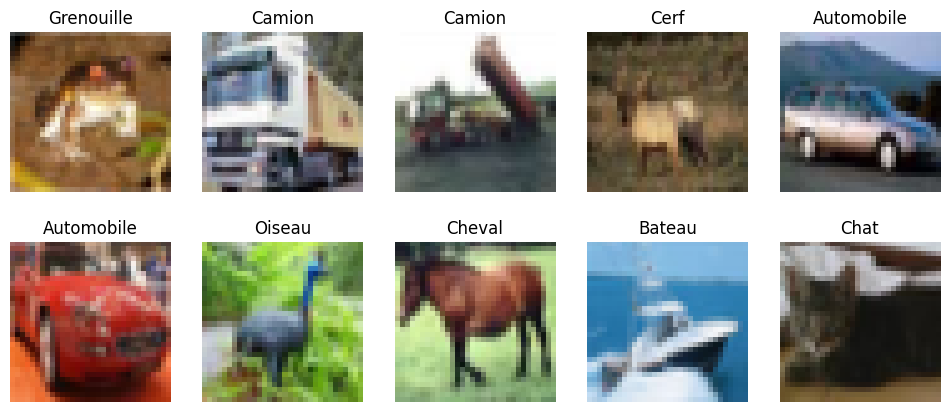

In [5]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(cifar10_classes[y_train[i][0]])
    plt.axis('off')
plt.show()

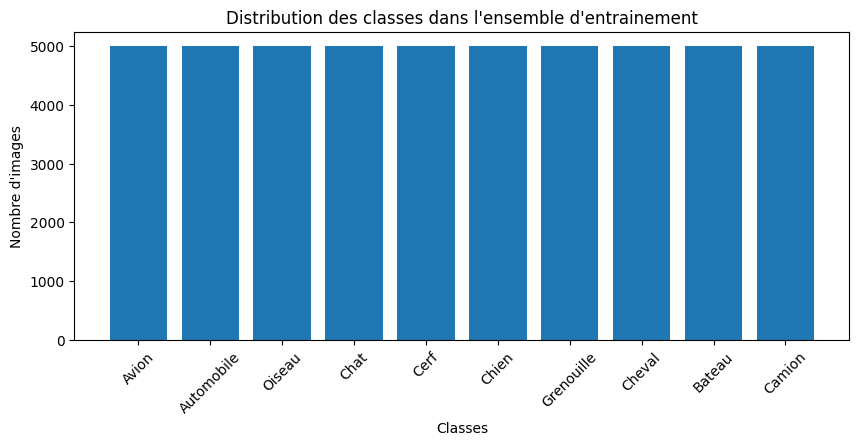

In [7]:
# Afficher la distribution des classes dans l'ensemble d'entrainement
class_distribution = [0] * 10
for label in y_train:
    class_distribution[label[0]] += 1
    
plt.figure(figsize=(10, 4))
plt.bar(cifar10_classes, class_distribution)
plt.title("Distribution des classes dans l'ensemble d'entrainement")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()

# Prétraitement des données

In [8]:
# normaliser les pixels des images en mettant à l'echelle entre 0 à 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
# transformer les étiquettes en vecteurs on-hot (encodage catégoriel)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
# Afficher les dimensions après le prétraitement
print("Forme de l'ensemble d'entrainement (images):{}".format(x_train.shape))
print("Forme de l'ensemble de test (étiquettes):{}".format(y_train.shape))
print("Forme de l'ensemble de test (images):{}".format(x_test.shape))
print("Forme de l'ensemble de test (étiquettes):{}".format(y_test.shape))

Forme de l'ensemble d'entrainement (images):(50000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes):(50000, 10)
Forme de l'ensemble de test (images):(10000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes):(10000, 10)


# Model MLP (Model de Pérceptron Multi-Couche)

## 1 - Construction du model

In [11]:
# Definition du model MLP pour la classification d'images
model_mlp = keras.Sequential([
    # Applatir les images 32*32 en une vecteur OneDim
    layers.Flatten(input_shape=(32, 32, 3)),
    
    # Ajouter une couche cachée/ dense de 128 neurones avec fonction d'activation
    layers.Dense(128, activation='relu'),
    
    # Ajouter la couche de sortie avec 10 neurones
    layers.Dense(10, activation='softmax')
])

/home/rantodev/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-30 19:23:29.776448: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# Compiler le modèle
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Afficher un résumer du model
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Entrainement du model
epochs = 100
batch_size = 32 # Taille du batch

model_mlp.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

model_mlp.save('model.h5')
# Utilisation de la validation split (20% des données pour la validation)
# historique = model_mlp.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

# Evaluation du model sur les données de test
# test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du model sur les données test
#print("Précision sur les données de test: {}%".format(test_accuracy*100))

Epoch 1/2


2024-11-30 19:25:25.568452: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2565 - loss: 2.1227

2024-11-30 19:25:41.614789: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.2567 - loss: 2.1222 - val_accuracy: 0.3375 - val_loss: 1.8566
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3622 - loss: 1.8045 - val_accuracy: 0.3721 - val_loss: 1.7679


Précision sur les données de test est de 42.6800012588501


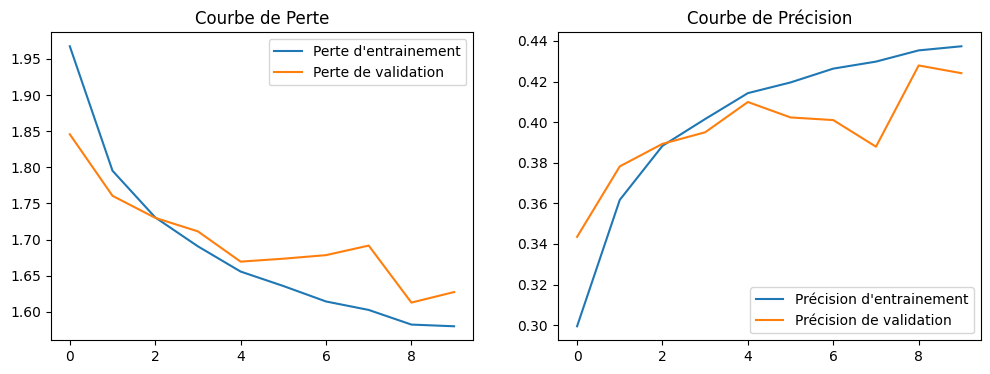

In [13]:
# Afficher les courbes d'apprentissages (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historique.history['loss'], label="Perte d'entrainement")
plt.plot(historique.history['val_loss'], label="Perte de validation")
plt.legend()
plt.title("Courbe de Perte")

plt.subplot(1, 2, 2)
plt.plot(historique.history['accuracy'], label="Précision d'entrainement")
plt.plot(historique.history['val_accuracy'], label="Précision de validation")
plt.legend()
plt.title("Courbe de Précision")

# Afficher la précision du model sur les données de test
print("Précision sur les données de test est de {}".format(test_accuracy*100))

In [14]:
# Définir les classes
CLASSES = np.array(["Avion", "Automobile", "Oiseau", "Chat", "Cerf", "Chien", "Grenouille", "Cheval", "Bateau", "Camion"])

# Prédire les classes pour les données de test
predictions = model_mlp.predict(x_test)
predictions_simple = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

 15/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  

2024-11-29 05:58:55.328830: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


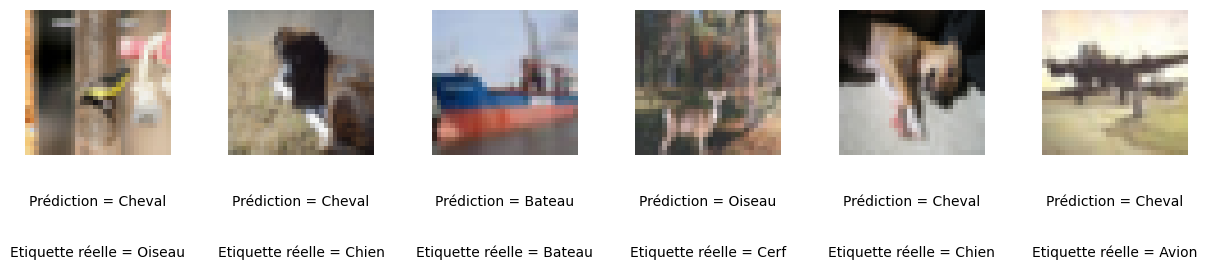

In [22]:
# Nombre d'images à afficher
n_image = 6
indices = np.random.choice(range(len(x_test)), n_image)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_image, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "Prédiction = " + str(predictions_simple[idx]),
        fontsize = 10,
        ha = "center",
        transform = ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "Etiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize = 10,
        ha = "center",
        transform = ax.transAxes,
    )
    ax.imshow(image)

# Afficher la figure
plt.show()